In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
file=open("Diazeno.txt","r")
data=file.read()
data=data.split("\n")
mat=[] #creando un arreglo vacio
data=data[0:-1]
for x in data:
    s=x.split(",")
    mat.append([float(s[0]),float(s[1])])#con float se convirtio las cadenas a un numero float, de cadena a numero
mat=np.array(mat) #esta variable tiene dos columnas una para temperatura y la otra para Cp(primera columna temp y la otra Cp)

In [14]:
mat.shape

(11020, 2)

In [22]:
T=mat[:,0]
y=mat[:,1] #Cp experimentales
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)
Cp_calc=X.dot(beta)
Cp_calc #Cp calculados

[  8.8997   93.7976  -53.12099  12.1159    0.36272]


array([36.53915934, 36.54295555, 36.54675367, ..., 69.52547946,
       69.52708316, 69.52868681])

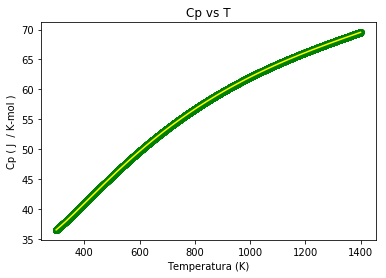

In [26]:
plt.scatter(T,y,color="green") #datos experimentales
plt.plot(T,Cp_calc,color="yellow") #Cp calculados con los coeficientes beta de la regresion
plt.title("Cp vs T")
plt.xlabel("Temperatura (K)")
plt.ylabel("Cp ( J  / K-mol )")
plt.show()